In [1]:
import textract, re
import os
import glob
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [2]:
os.chdir('portfolio')

In [3]:
file_names = glob.glob("*.pdf")

In [4]:
file_names

['Essay2FinalRevision.pdf',
 'ResearchPaperRevisionStatement.pdf',
 'ResearchPaperOriginal.pdf',
 'Essay2Original.pdf',
 'FinalPaperRevised.pdf',
 'InstagramReflection.pdf',
 'Introduction.pdf',
 'LetterToMark.pdf']

In [5]:
words = []
text = textract.process('Introduction.pdf')
words = re.findall(r"[^\W_]+", text.decode('utf-8'), re.MULTILINE)

In [6]:
words_list = []
for file in file_names:
    text = textract.process(file)
    words = re.findall(r"[^\W_]+", text.decode('utf-8'), re.MULTILINE)
    words_list += words

In [7]:
len(words_list)

19683

In [8]:
words_list = list(filter(lambda a: a != 'Commented', words_list))
len(words_list)

19448

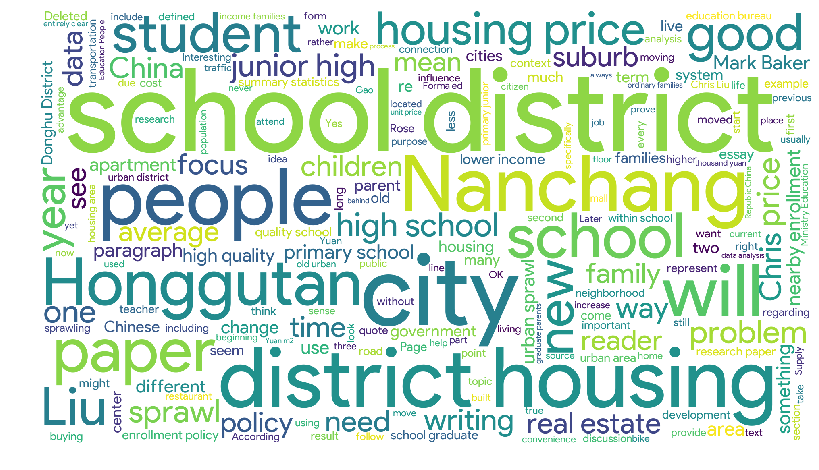

In [9]:
unique_string=(" ").join(words_list)
wordcloud = WordCloud(font_path='/word_count/product-sans/Product Sans Regular.ttf',
                      width=1920, height=1080, 
                      background_color='white'
                      ).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png", bbox_inches='tight', dpi=1000, quality=95)
plt.show()
plt.close()